**Introduction:** Bellabeat, a high-tech manufacturer of health-focused products for women wants to get analyzed smart devices data to gain insight into how consumers are using the smart devices. This analysis will help guide future marketing strategies for the team.

**Author:** Vishal Raj                               
**Date :** 17th August, 2021

<img src="Bellabeat.PNG">

# **How Can a Wellness Technology Company Play It Smart?**

**The analysis follows the 6 steps of Data Analysis: Ask, Prepare, Process, Analyse, Share and Act.**

# PHASE 1 : ASK

**In this phase, we define the problem and objectives of our case study and its desired outcome.**

**1.1 Business Task:**
Analyze FitBit fitness tracker data to gain insights into how consumers are using it, discover trends and make important recommendations for Bellabeat marketing strategy.

**1.2 Business Objectives:**
* What are some trends in smart device usage?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing strategy?

**1.3 Key Stakeholders:**
* Urška Sršen: Bellabeat’s co-founder and Chief Creative Officer
* Sando Mur: Mathematician, Bellabeat’s co-founder and key member of the Bellabeat executive team
* Bellabeat marketing analytics team: A team of data analysts guiding Bellabeat’s marketing strategy.

**1.4 Deliverables**
* A clear summary of the business task
* A description of all data sources used
* Documentation of any cleaning or manipulation of data
* A summary of analysis
* Supporting visualizations and key findings
* High-level content recommendations based on the analysis

# PHASE 2 : PREPARE

**2.1 Information on Data Source:**

The data is publicly available on Kaggle: [FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit), stored in 18 csv files with wide-format.
It was generated by respondents from a distributed survey via Amazon Mechanical Turk between 12th Mar '16 to 12th May '16.
Thirty eligible FitBit users consented to the submission of personal tracker data which includes (1) physical activity recorded in minutes, (2) sleep records/time in bed, (3) active distance(Light, Moderate, etc.), (4) calories burnt and (5) steps, (6) workout intensities, all of which we will be using for our analysis.

**2.2 Is Data ROCCC?**

A good data source is ROCCC which stands for **R**eliable, **O**riginal, **C**omprehensive, **C**urrent, and **C**ited.

Reliable - LOW - Not reliable as it has only 33 respondents(From viewing the data).                                 
Original - LOW - Third party provider (Amazon Mechanical Turk).                          
Comprehensive - MED - Parameters match most of Bellabeat's products' parameters.                              
Current - LOW - Data is 5 years old and is not relevant.                                
Cited - LOW - Data collected from third party, hence 'unknown'.                            

**Warning:** The dataset is considered as bad quality data and it is not recommended to produce business recommendations based on this data.

**2.3 Limitations of Data Set:**

Data was collected in the year 2016. Users' daily activities, fitness and sleeping habits, diet and food consumption may have changed since then, hence data may not be timely or relevant.
Sample size of 33 female FitBit users is not representative of the entire female population and moreover weight data is only from 8 users.
As data is collected in a survey, hence unable to ascertain the integrity or accuracy of data.

In [15]:
# Importing libraries

library(tidyverse) # metapackage of all tidyverse packages
library(reshape2)
library(scales)
library(lessR)
library(gridExtra)

# Importing data

dailyActivity <- read.csv("dailyActivity_merged.csv")
sleepDay <- read.csv("sleepDay_merged.csv")
hourlyIntensities <- read.csv("hourlyIntensities_merged.csv")
hourlyCalories <- read.csv("hourlyCalories_merged.csv")
heartRate <- read.csv("heartrate_seconds_merged.csv")

**2.4 Exploring & Summarizing Data:**

Here's the glimpse of the Data.

In [16]:
head(dailyActivity)
head(hourlyIntensities)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


In [17]:
n_distinct(dailyActivity$Id)
n_distinct(hourlyCalories$Id)
n_distinct(hourlyIntensities$Id)
n_distinct(sleepDay$Id)
n_distinct(heartRate$Id)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 14

This information tells us about the number of participants in each data sets.

There are 33 participants in the activity, calories and intensities data sets, 24 in the sleep data set & 14 in heart rate data set.

Summmary Statistics:

In [18]:
# activity
dailyActivity %>%  
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes, Calories) %>%
  summary()

# explore number of active minutes per category
dailyActivity %>%
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  summary()

# hourlycalories
hourlyCalories %>%
  select(Calories) %>%
  summary()

# hourlyintensities
hourlyIntensities %>%
  select(TotalIntensity, AverageIntensity) %>%
  summary()

# sleep
sleepDay %>%
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()

# heartRate
heartRate %>%
  select(Value) %>%
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  

 TotalIntensity   AverageIntensity
 Min.   :  0.00   Min.   :0.0000  
 1st Qu.:  0.00   1st Qu.:0.0000  
 Median :  3.00   Median :0.0500  
 Mean   : 12.04   Mean   :0.2006  
 3rd Qu.: 16.00   3rd Qu.:0.2667  
 Max.   :180.00   Max.   :3.0000  

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

     Value       
 Min.   : 36.00  
 1st Qu.: 63.00  
 Median : 73.00  
 Mean   : 77.33  
 3rd Qu.: 88.00  
 Max.   :203.00  

**As you can see, the summary contains some unexplainable values like total number of steps can't be zero for a day(I'm sure the person is not like he's not even moving a little for the whole day). Therefore we need to clean our data of incorrect values and impossible outliers.**

# **PHASE 3 : PROCESS**

**3.1 Tools and Methods(Data Cleaning & Manipulation):**

I will be using R libraries like tidyverse which is a collection of essential R packages for working with data. The I'll be cleaning and formatting data into proper formats, like removing null or less than 250 steps value or changing the date and time into proper format. I will also be performing sanity check on the data.

**Fixing Date/Time:** I spotted some problems with the timestamp data. So before analysis, I need to convert it to proper date time format and split it into date and time.

In [19]:
#dailyActivity
dailyActivity$ActivityDate=as.POSIXct(dailyActivity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
dailyActivity$date <- format(dailyActivity$ActivityDate, format = "%m/%d/%y")
#sleepDay
sleepDay$SleepDay=as.POSIXct(sleepDay$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleepDay$date <- format(sleepDay$SleepDay, format = "%m/%d/%y")
#hourlyIntensities
hourlyIntensities$ActivityHour=as.POSIXct(hourlyIntensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
hourlyIntensities$time <- format(hourlyIntensities$ActivityHour, format = "%H:%M:%S")
hourlyIntensities$date <- format(hourlyIntensities$ActivityHour, format = "%m/%d/%y")
#hourlyCalories
hourlyCalories$ActivityHour=as.POSIXct(hourlyCalories$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
hourlyCalories$time <- format(hourlyCalories$ActivityHour, format = "%H:%M:%S")
hourlyCalories$date <- format(hourlyCalories$ActivityHour, format = "%m/%d/%y")
#heartRate
heartRate$Time=as.POSIXct(heartRate$Time, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
heartRate$time <- format(heartRate$Time, format = "%H:%M:%S")
heartRate$date <- format(heartRate$Time, format = "%m/%d/%y")

**Merging Data:** I’m going to merge (inner join) 'dailyActivity' and 'sleepDay' on column Ids and date (that I previously created after converting data to date time format) along with 'hourlyIntensities' & 'hourlyCalories' together.

In [20]:
activity <- merge(dailyActivity, sleepDay, by=c('Id', 'date'))
activity <- activity[ , -which(names(activity) %in% c("ActivityDate","SleepDay"))]  #dropping extra date columns
head(activity)

,Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1503960366,04/12/16,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346
2,1503960366,04/13/16,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407
3,1503960366,04/15/16,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442
4,1503960366,04/16/16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367
5,1503960366,04/17/16,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712
6,1503960366,04/19/16,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320


In [21]:
hourlydata <- merge(hourlyIntensities, hourlyCalories, by=c('Id', 'time', 'date'))
hourlydata <- hourlydata[ , -which(names(hourlydata) %in% c("ActivityHour.x","ActivityHour.y"))]  #dropping extra date columns
head(hourlydata)

,Id,time,date,TotalIntensity,AverageIntensity,Calories
,<dbl>,<chr>,<chr>,<int>,<dbl>,<int>
1,1503960366,00:00:00,04/12/16,20,0.333333,81
2,1503960366,00:00:00,04/13/16,14,0.233333,69
3,1503960366,00:00:00,04/14/16,4,0.066667,56
4,1503960366,00:00:00,04/15/16,6,0.100000,60
5,1503960366,00:00:00,04/16/16,15,0.250000,77
6,1503960366,00:00:00,04/17/16,0,0.000000,47


**Cleaning null or impossible values:**

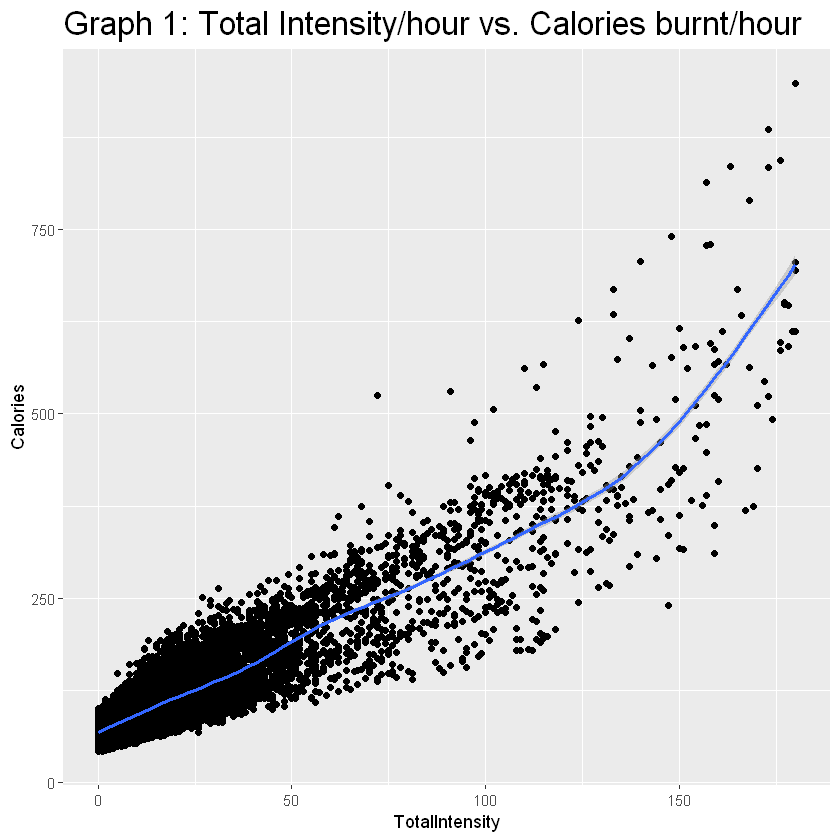

In [22]:
g1 <- ggplot(data=hourlydata, aes(x=TotalIntensity, y=Calories)) + 
  geom_point() + geom_smooth(method = "gam", formula = y ~ s(x, bs = "cs")) + labs(title="Graph 1: Total Intensity/hour vs. Calories burnt/hour") +
theme(plot.title = element_text(size=20))
g1

Here, we can see that as 'hourly intensity' increases, 'hourly calories burnt' increases too, also with no significant outliers, hence we can say by sanity check that the data is correct.

Also, I spotted null and impossible values in the daily activity data of which I will be removing the whole rows from both the data sets i.e. 'dailyActivity' & 'activity' as I will be using both of them for analysis since by merging sleep data we lost 33-24=9 participants. Therefore for analysis that doesn't include sleep data, I will be using 'dailyActivity' dataset as to keep our sample data to the maximum possible.

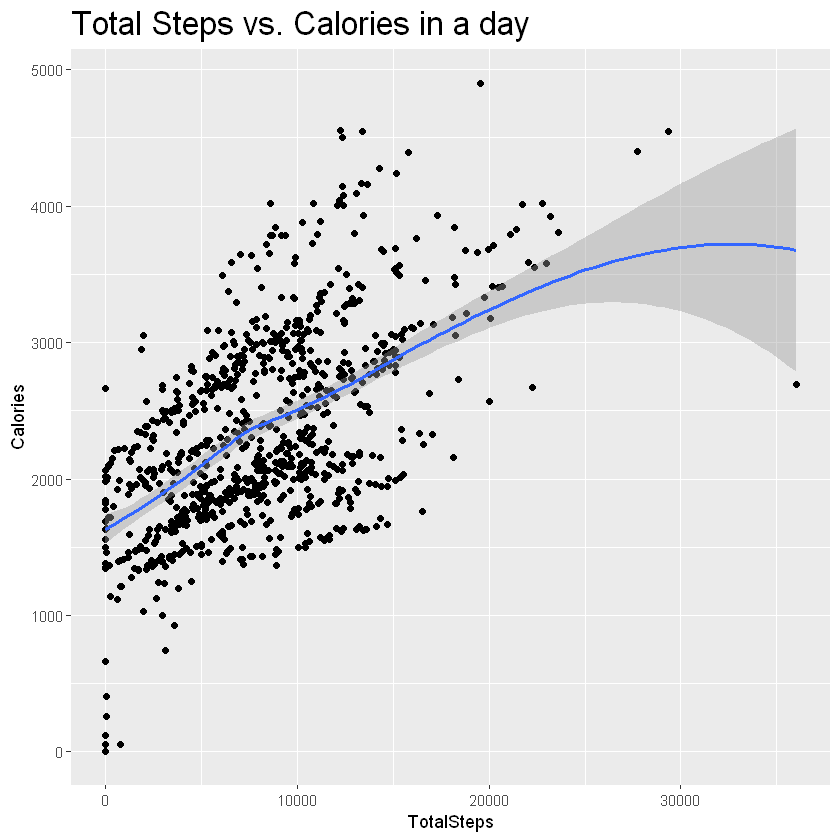

In [23]:
ggplot(data=dailyActivity, aes(x=TotalSteps, y=Calories)) + 
  geom_point() + geom_smooth(method = "loess", formula = y ~ x) + labs(title="Total Steps vs. Calories in a day") +
theme(plot.title = element_text(size=20))

Here, I will remove the outliers of less than 250 steps and more than 25000 steps and also less than 100 calories burnt total in a day.

In [24]:
#Here if you need to experiment anything by providing unique ID's to each row of data, following is the code:
#activity <- cbind(ID = 1:nrow(dailyActivity), dailyActivity)    # Applying cbind function, just remove the comment

activity <- activity %>% filter(TotalSteps > 250 & TotalSteps <25000)
activity <- activity %>% filter(Calories > 100 & Calories < 4750)
activity <- activity %>% filter(TotalMinutesAsleep > 200 & TotalMinutesAsleep < 720)       #Removing an outlier in Sleep Data
dailyActivity <- dailyActivity %>% filter(TotalSteps > 250 & TotalSteps < 25000)
dailyActivity <- dailyActivity %>% filter(Calories > 100 & Calories < 4750)

head(activity)

,Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1503960366,04/12/16,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346
2,1503960366,04/13/16,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407
3,1503960366,04/15/16,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442
4,1503960366,04/16/16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367
5,1503960366,04/17/16,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712
6,1503960366,04/19/16,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320


After doing the above mentioned steps, here is the new graph without any significant outliers which will effect the analysis.

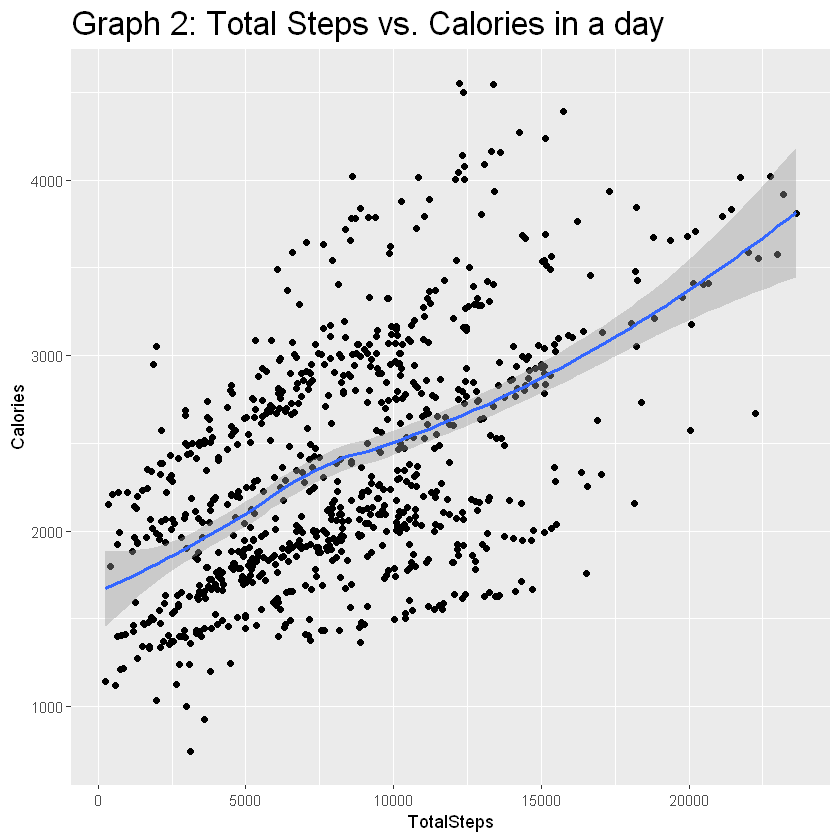

In [25]:
g2 <- ggplot(data=dailyActivity, aes(x=TotalSteps, y=Calories)) + 
  geom_point() + geom_smooth(method = "loess", formula = y ~ x) + labs(title="Graph 2: Total Steps vs. Calories in a day") +
theme(plot.title = element_text(size=20))
g2

Also we can't have Total Hours of Activity & Sedentary Hours greater than 20(assuming atleast 4 hours of sleep) & less than 1 hour.

In [26]:
dailyActivity$TotalMins <- (dailyActivity$VeryActiveMinutes + dailyActivity$FairlyActiveMinutes + dailyActivity$LightlyActiveMinutes + dailyActivity$SedentaryMinutes)
dailyActivity <- dailyActivity %>% filter(TotalMins > 60 & TotalMins < 1200)

activity$TotalMins <- (activity$VeryActiveMinutes + activity$FairlyActiveMinutes + activity$LightlyActiveMinutes + activity$SedentaryMinutes)
activity <- activity %>% filter(TotalMins > 60 & TotalMins < 1200)

# **PHASE 4 : ANALYSIS**

Now the data have been merged and cleaned after properly formatting the **Summary Statistics** are as follows:

In [27]:
# activity
dailyActivity %>%  
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes, Calories) %>%
  summary()

# explore number of active minutes per category
dailyActivity %>%
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  summary()

# hourlycalories
hourlyCalories %>%
  select(Calories) %>%
  summary()

# hourlyintensities
hourlyIntensities %>%
  select(TotalIntensity, AverageIntensity) %>%
  summary()

# sleep
activity %>%
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()

# heartRate
heartRate %>%
  select(Value) %>%
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :  254   Min.   : 0.160   Min.   : 125.0   Min.   : 741  
 1st Qu.: 5194   1st Qu.: 3.605   1st Qu.: 629.5   1st Qu.:1787  
 Median : 8891   Median : 6.260   Median : 716.0   Median :2179  
 Mean   : 8447   Mean   : 5.956   Mean   : 697.7   Mean   :2350  
 3rd Qu.:11200   3rd Qu.: 7.885   3rd Qu.: 773.5   3rd Qu.:2884  
 Max.   :22770   Max.   :17.540   Max.   :1053.0   Max.   :4552  

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   : 17.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:154.5       
 Median :  8.00    Median : 10.00      Median :206.0       
 Mean   : 24.77    Mean   : 17.71      Mean   :214.8       
 3rd Qu.: 37.00    3rd Qu.: 26.00      3rd Qu.:263.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  

 TotalIntensity   AverageIntensity
 Min.   :  0.00   Min.   :0.0000  
 1st Qu.:  0.00   1st Qu.:0.0000  
 Median :  3.00   Median :0.0500  
 Mean   : 12.04   Mean   :0.2006  
 3rd Qu.: 16.00   3rd Qu.:0.2667  
 Max.   :180.00   Max.   :3.0000  

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   :213.0      Min.   :248.0  
 1st Qu.:1.000     1st Qu.:380.2      1st Qu.:415.2  
 Median :1.000     Median :439.0      Median :469.0  
 Mean   :1.118     Mean   :435.0      Mean   :474.8  
 3rd Qu.:1.000     3rd Qu.:492.0      3rd Qu.:530.0  
 Max.   :3.000     Max.   :700.0      Max.   :961.0  

     Value       
 Min.   : 36.00  
 1st Qu.: 63.00  
 Median : 73.00  
 Mean   : 77.33  
 3rd Qu.: 88.00  
 Max.   :203.00  

**Some interesting discoveries/insights from this summary:**

Average total steps per day are **8414**, which are good for having health benefits for according to the CDC research, but can be improved atleast to 10000 steps/day as a 2020 study found that participants who took 8,000 steps per day had a 51% lower risk of dying by any cause compared with those who took 4,000 per day. This trend continued with higher step counts, as participants who took 12,000 steps per day had a 65% lower risk of dying than those who took 4,000.

Average sedentary time is **697.5 minutes or ~11.6 hours** which is a lot if you count 7 hours/day as 'sleep time' and the rest **5.4 hours of time** left from 24 hours total for any other activities. Normally, more than 11 hours/day of sedentary behaviour is lifestyle of people of age more than 70 years.

The majority of the participants are only lightly active, therefore the average calories burnt is also low i.e. **2375/day**.

The average total intensity per hour of their activities is also low i.e. **12**.

On the average, participants sleep 1 time for **~7.3 hours**.

Minimum & Maximum value for heart rate has gone to 36 & 203 respectively, which is not a good sign for heart health.

Also, now by analyzing the data, I can see if there are any more trends for me to identify. I think that watching the total percentage of each user types & calories burnt by activity/user type, and seeing the relation of the activity and the sleep quality, it will provide me with some insights. For that, I will create some new summarized tables where I will classify some of the aspects of the data into more easily interpretable categories for the analysis.

In [28]:
#In order to better visualize the data I will group the user into four categories based on their maximum time given to an activity type, this will be very useful to quickly see patterns and visualize them:

data_by_usertype <- dailyActivity %>%
summarise(
user_type = factor(case_when(
    SedentaryMinutes > mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Sedentary",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes > mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Lightly Active",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes > mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Fairly Active",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes > mean(VeryActiveMinutes) ~ "Very Active",
),levels=c("Sedentary", "Lightly Active", "Fairly Active", "Very Active")), Calories, .group=Id) %>%
drop_na()

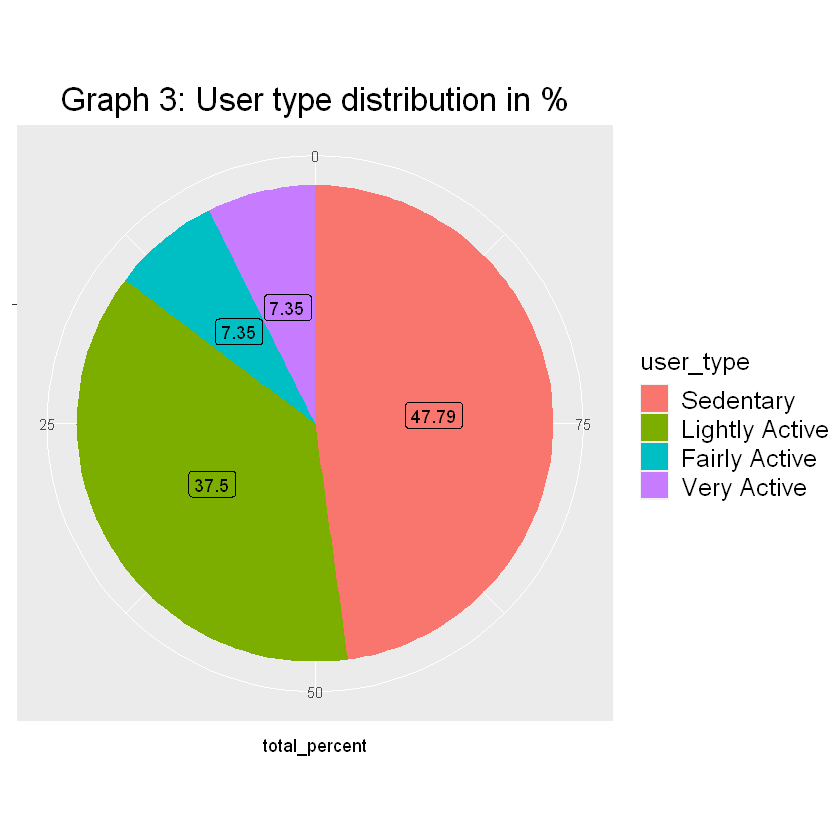

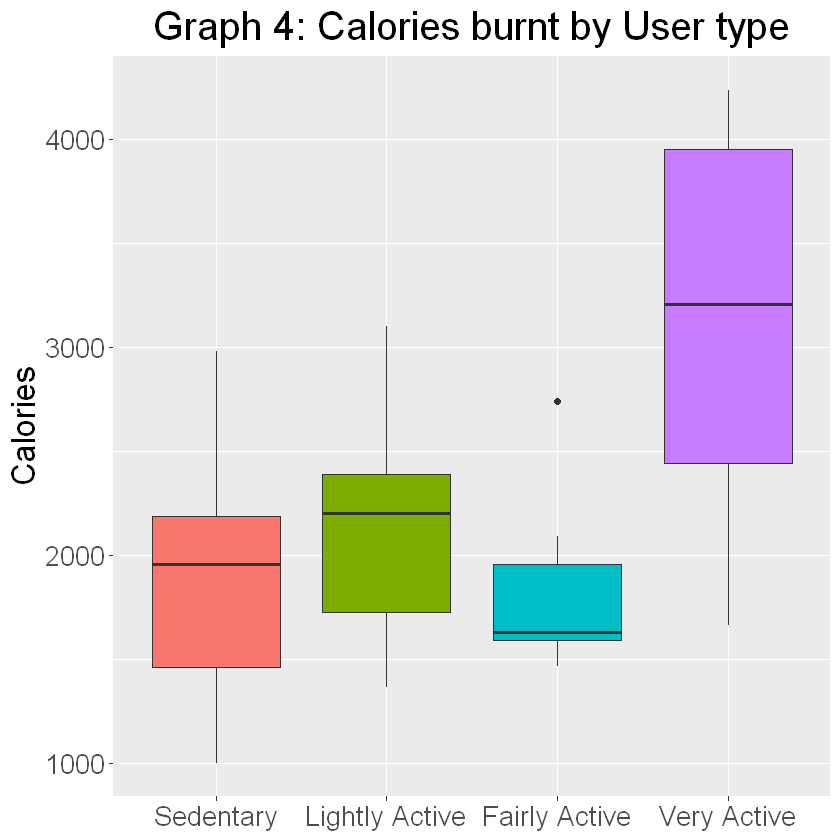

In [29]:
#With this new table I can now visualize both the user type distribution and the calories burnt for each user type:
df <- data_by_usertype %>%
group_by(user_type) %>%
summarise(total = n()) %>%
mutate(totals = sum(total)) %>%
group_by(user_type) %>%
summarise(total_percent = (total / totals)*100)
is.num <- sapply(df, is.numeric)
df[is.num] <- lapply(df[is.num], round, 2)

g3 <- ggplot(df, aes(x = "", y = total_percent, fill = user_type)) +
  geom_bar(width = 1, stat = "identity", position="stack") +
  geom_label(aes(label = total_percent),
             position = position_stack(vjust = 0.5),
             show.legend = FALSE) +
labs(title="Graph 3: User type distribution in %", x=NULL) +
  coord_polar(theta = "y",start=0,direction=-1) +
theme(text = element_text(),plot.title = element_text(size = 20, hjust = 0.5), legend.title=element_text(size = 15), legend.text = element_text(size = 15))
g3

g4 <- ggplot(data_by_usertype, aes(user_type, Calories, fill=user_type)) +
    geom_boxplot() +
    theme(legend.position="none") +
    labs(title="Graph 4: Calories burnt by User type", x=NULL) +
    theme(legend.position="none", text = element_text(size = 20),plot.title = element_text(hjust = 0.5))
g4

It seems that the better part of the users are mostly Sedentary or Lightly active users but it's very interesting to see that even though they are the biggest category, the Fairly active and most importantly, the Very active are the ones with more calories burnt. That is not necessarily surprising but it confirms the suspicion that the level of activity relates with the calories burnt and so it's an important factor in any effort to lose weight.

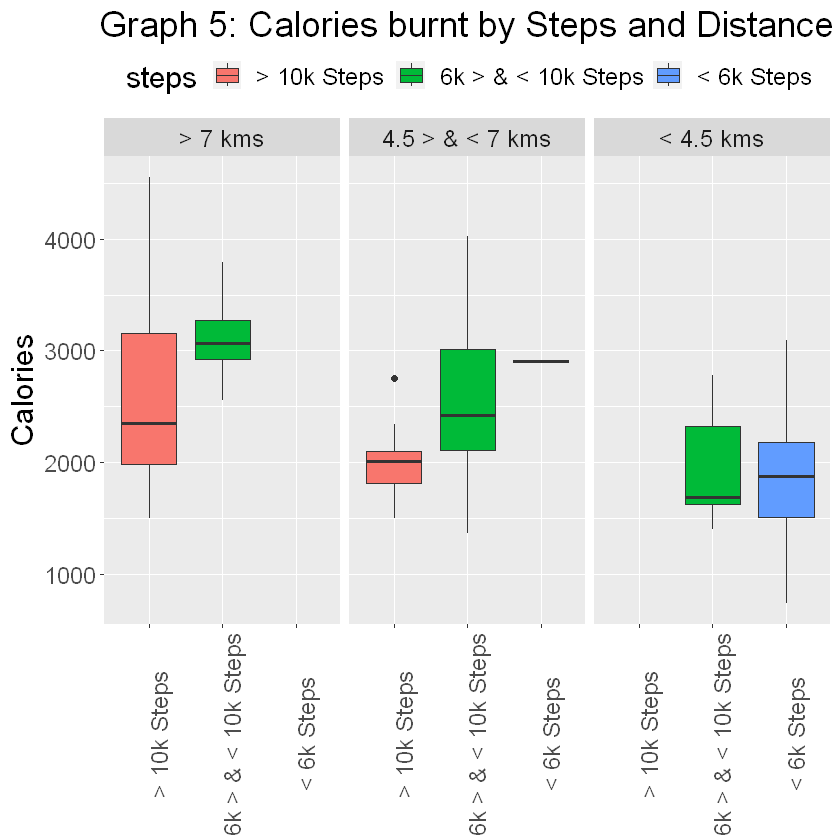

In [30]:
#I thought it will also be interesting to check the relation between Distance/Steps and Calories burnt so I plotted them:

g5 <- dailyActivity %>%
summarise(
distance = factor(case_when(
    TotalDistance < 4.5 ~ "< 4.5 kms",
    TotalDistance >= 4.5 & TotalDistance <= 7 ~ "4.5 > & < 7 kms",
    TotalDistance > 7 ~ "> 7 kms",
),levels = c("> 7 kms","4.5 > & < 7 kms","< 4.5 kms")),
steps = factor(case_when(
    TotalSteps < 6000 ~ "< 6k Steps",
    TotalSteps >= 6000 & TotalSteps <= 10000 ~ "6k > & < 10k Steps",
    TotalSteps > 10000 ~ "> 10k Steps",
),levels = c("> 10k Steps","6k > & < 10k Steps","< 6k Steps")),
Calories) %>%
ggplot(aes(steps,Calories,fill=steps)) +
    geom_boxplot() +
    facet_wrap(~distance)+
    labs(title="Graph 5: Calories burnt by Steps and Distance",x=NULL) + 
    theme(legend.position="top", text = element_text(size = 18),plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=90, hjust=0.5))
g5

This boxplot represents the calories burnt by the three categories of participants(steps based) on the summary values and then its faceted by the three categories of distance traveled. I did this to see which aspect is more important to the calories burnt, the steps or the distance traveled and here we can see interestingly that the most calories burnt are the "6k > & < 10k Steps" and "> 7 kms" which would indicate some kind of running activity that allows the user to burn more calories with less steps. Thus, showing that speed & intensities are important for more calorie burn than distance.

In [31]:
#Now let's focus on the sleep quality, for that I will now make categories for the sleeping time and I will make a new table with the sleeping categories percent for each individual user type:

sleepType_by_userType <- activity %>%
group_by(Id) %>%
summarise(
user_type = factor(case_when(
    SedentaryMinutes > mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Sedentary",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes > mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Lightly Active",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes > mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Fairly Active",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes > mean(VeryActiveMinutes) ~ "Very Active",
),levels=c("Sedentary", "Lightly Active", "Fairly Active", "Very Active")),
sleep_type = factor(case_when(
    mean(TotalMinutesAsleep) < 390 ~ "Bad Sleep",
    mean(TotalMinutesAsleep) > 390 & mean(TotalMinutesAsleep) <= 480 ~ "Normal Sleep",
    mean(TotalMinutesAsleep) > 480 ~ "Over Sleep",
),levels=c("Bad Sleep", "Normal Sleep", "Over Sleep")),.groups="drop"
) %>%
drop_na() %>%
group_by(user_type) %>%
summarise(bad_sleepers = sum(sleep_type == "Bad Sleep"), normal_sleepers = sum(sleep_type == "Normal Sleep"),over_sleepers = sum(sleep_type == "Over Sleep"),total=n(),.groups="drop") %>%
group_by(user_type) %>%
summarise(
    bad_sleepers = total / bad_sleepers, 
    normal_sleepers = total / normal_sleepers, 
    over_sleepers = total / over_sleepers,
    .groups="drop"
)
is.na(sleepType_by_userType) <-sapply(sleepType_by_userType, is.infinite)
sleepType_by_userType[is.na(sleepType_by_userType)] = 0

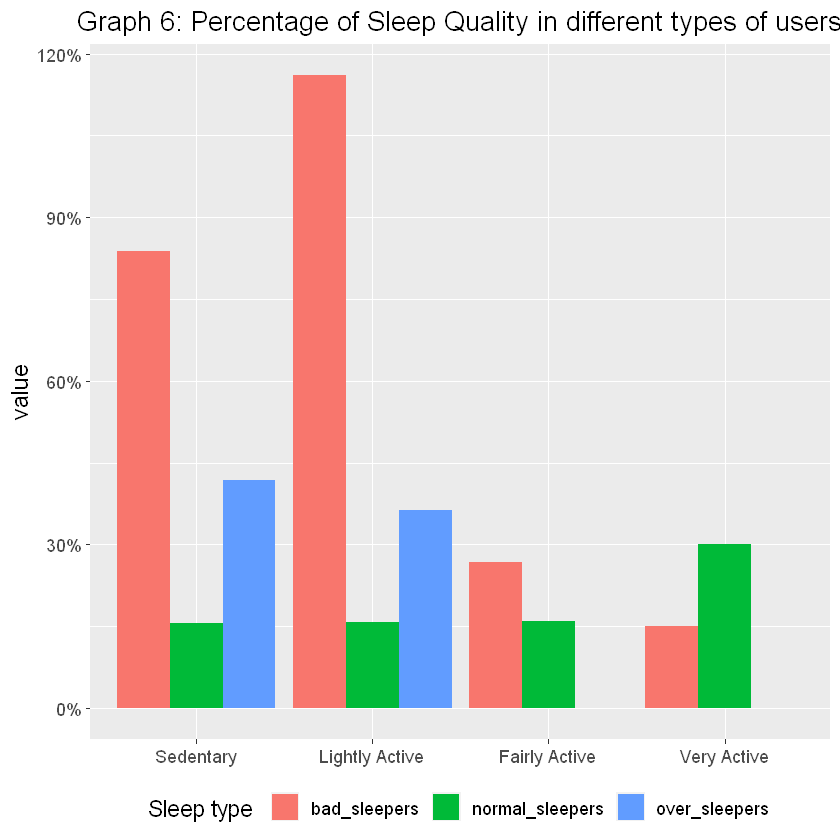

In [32]:
#Now we can plot the data for each user type:

sleepType_by_userType_melted<- melt(sleepType_by_userType, id.vars = "user_type")

g6 <- ggplot(sleepType_by_userType_melted, aes(user_type, value, fill = variable)) +
geom_bar(position = "dodge", stat = "identity") +
scale_y_continuous(labels = scales::percent_format(scale = 10)) +
labs(title="Graph 6: Percentage of Sleep Quality in different types of users", x=NULL, fill="Sleep type") + 
theme(legend.position="bottom",text = element_text(size = 13.5),plot.title = element_text(hjust = 0.5))
g6

Time for the reality, the chart shows very clearly the relation between the activity level and sleep quality as in the 'Sedentary' & 'Lightly Active' users we find the largest percentage of bad sleepers and with some fair activity we see an increase of normal sleepers with a good amount of increase in 'Very Active' users.

The most unexpected result for me was the decrease of over sleepers (more than 8 hours) in the most active categories which makes sense given the fact that they are people that don't like sticking around in bed for a long time.

# **PHASE 5 : SHARE**

In this phase, I'm creating visualizations and communicating my findings based on my analysis.

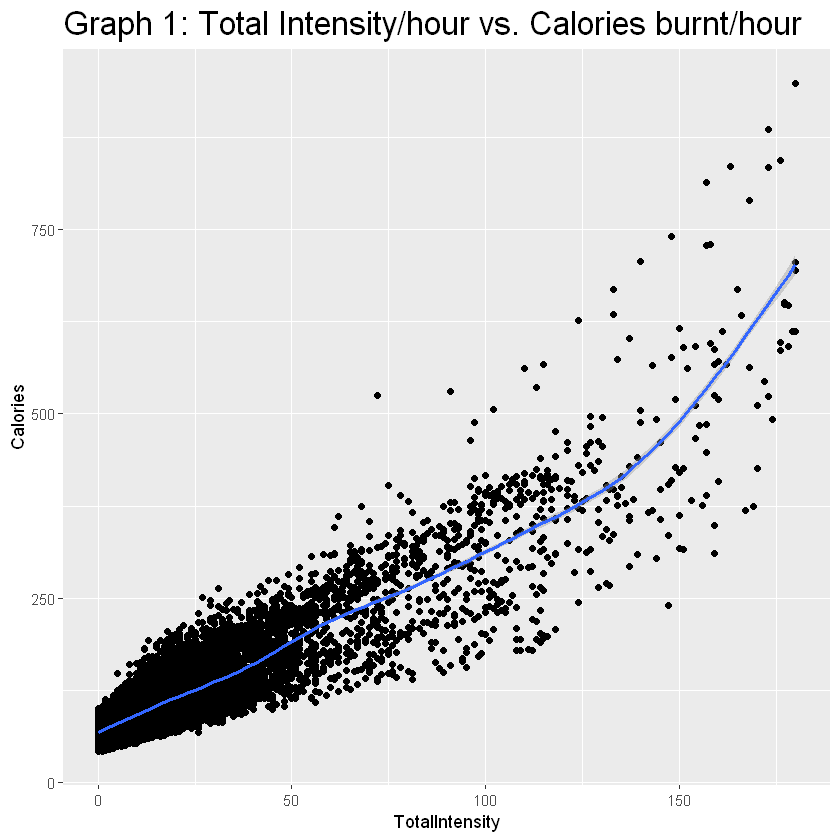

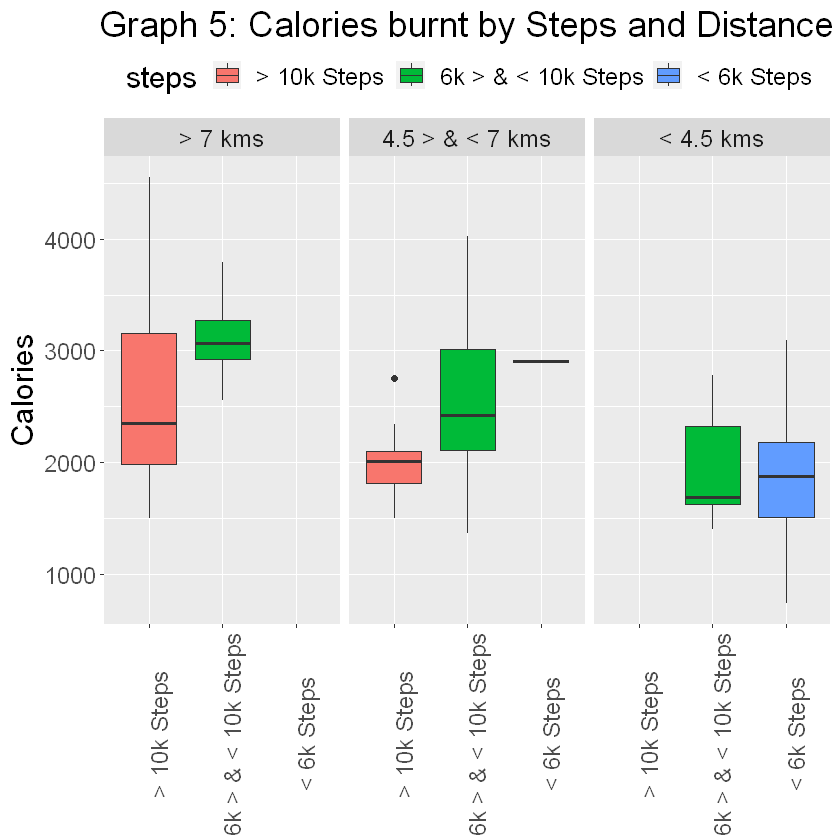

In [33]:
g1
g5

There is positive correlation here between Total Intensity and Calories in 'Graph 1, also from 'Graph 5' we are seeing that even when number of steps are low i.e. in between 6k & 10k, we are burning more calories than steps greater than 10k, thus proving that the more intensified activity we'll do, the more calories we'll burn.

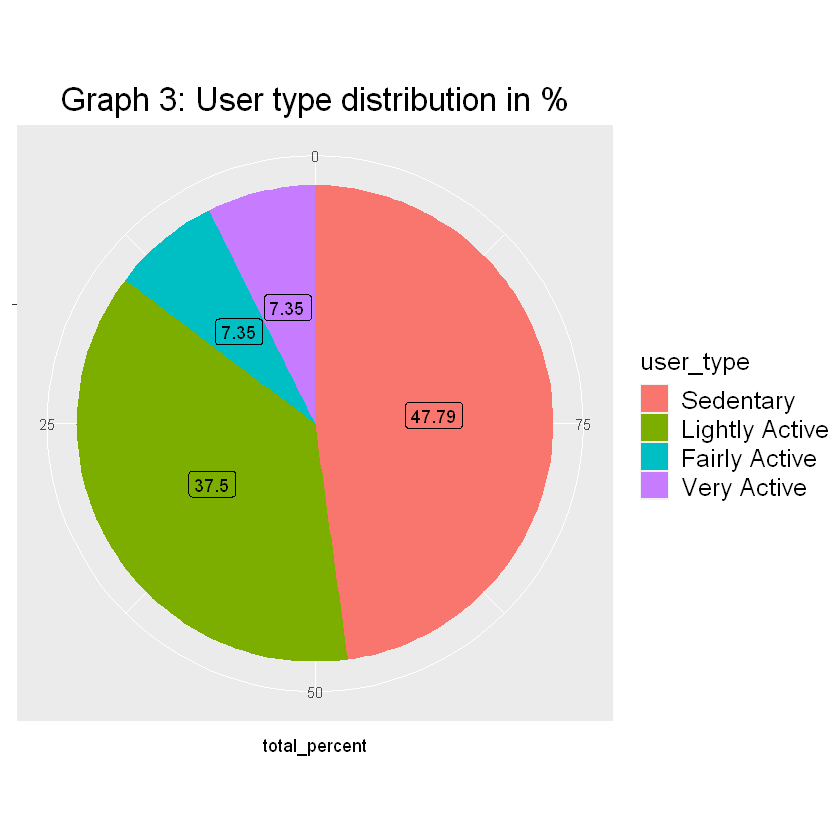

In [34]:
g3

Here, we can see that almost 50 percent of users are living having a sedentary lifestyle, and almost 40 percent of users are only lightly active. So, overall 85-90 percent of users are either have a sedentary lifestyle or are lightly active.

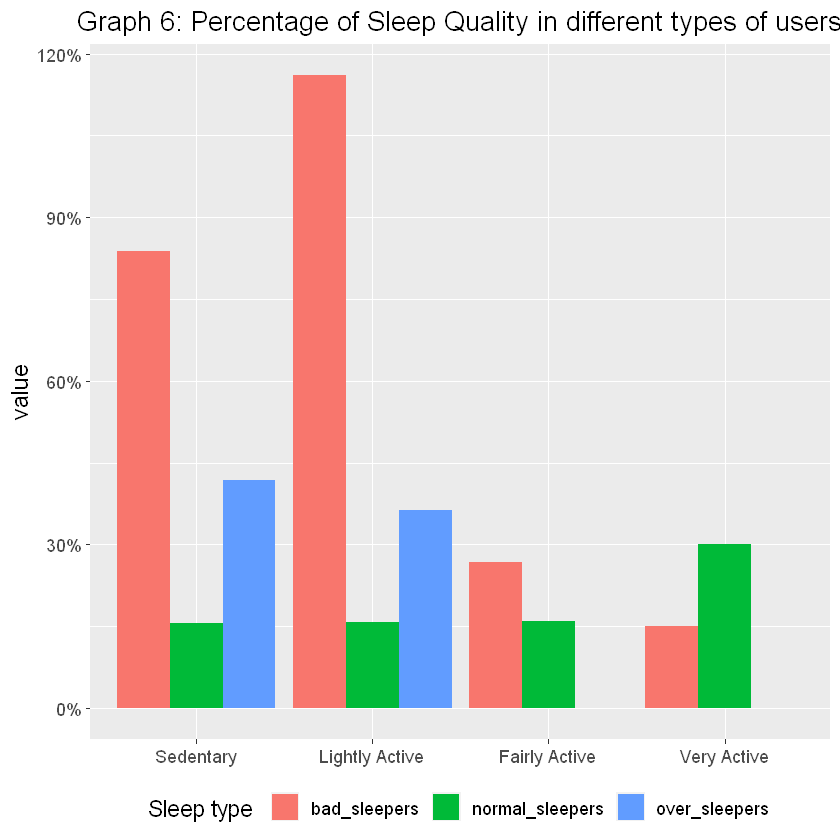

In [35]:
g6

As found earlier also, the relation between the activity level and sleep quality as in the 'Sedentary' & 'Lightly Active' users were the largest percentage of bad sleepers and with some fair activity we see an increase of normal sleepers with a good amount of increase in 'Very Active' users.

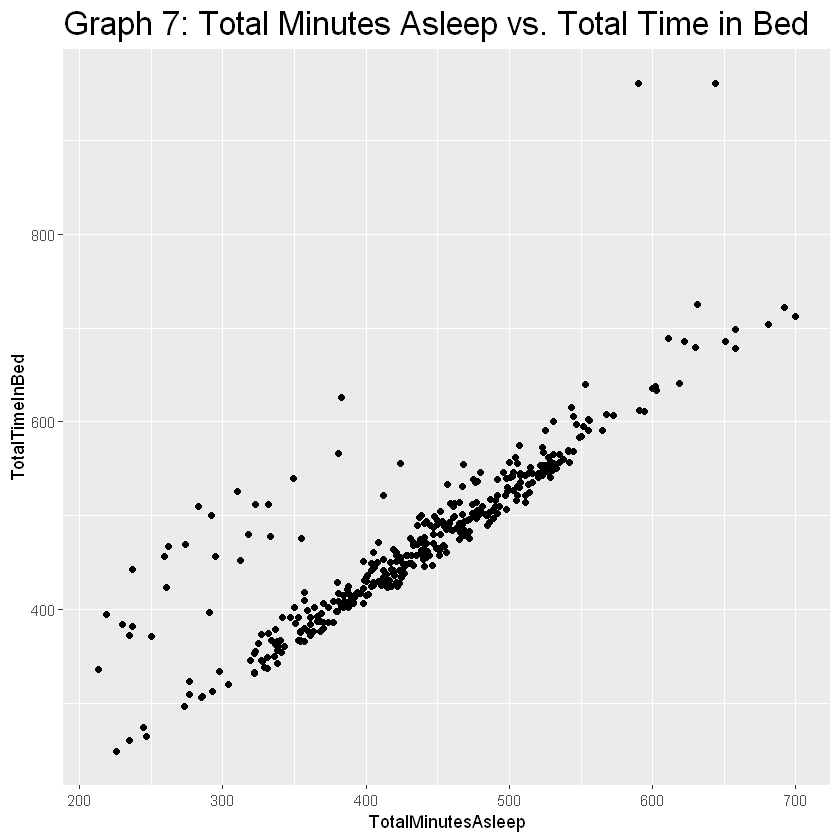

In [36]:
g7 <- ggplot(data=activity, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + 
  geom_point()+ labs(title="Graph 7: Total Minutes Asleep vs. Total Time in Bed") +
theme(plot.title = element_text(size=20))
g7

Here, we can see that the relationship between Total Minutes Asleep and Total Time in Bed looks almost linear, but is little curving towards more Total Time in Bed.

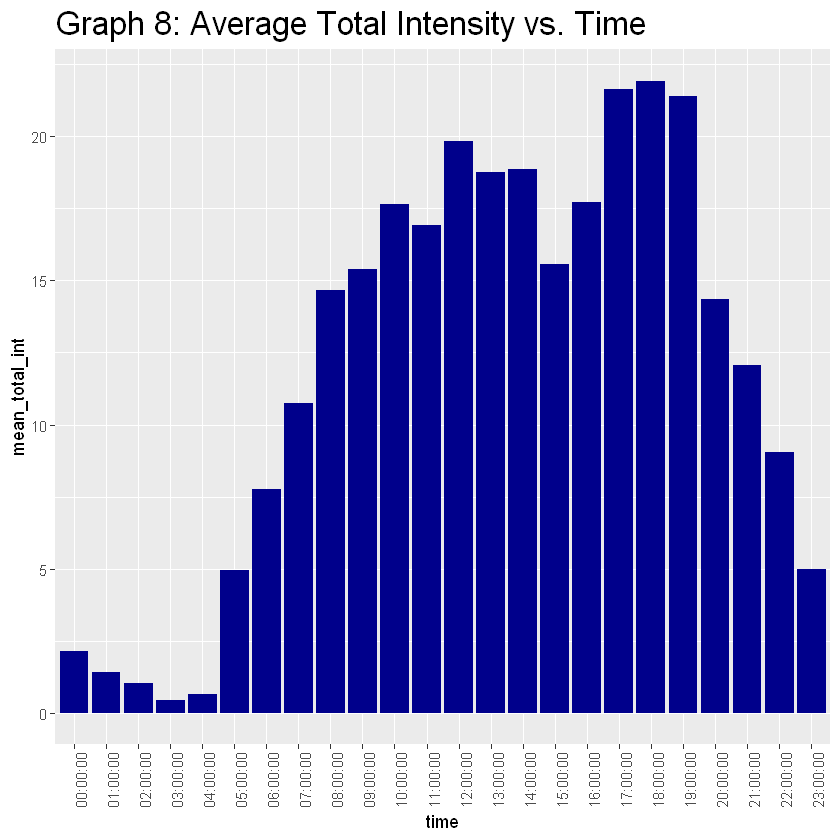

In [37]:
int_new <- hourlyIntensities %>%
  group_by(time) %>%
  drop_na() %>%
  summarise(mean_total_int = mean(TotalIntensity))

g8 <- ggplot(data=int_new, aes(x=time, y=mean_total_int)) + geom_histogram(stat = "identity", fill='darkblue') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Graph 8: Average Total Intensity vs. Time") +
theme(plot.title = element_text(size=20))
g8

From here we can see that people are most active between 5 am and 7pm. I suppose, that people go to a gym or for a walk after finishing work.

List of 1
 $ plot.title:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

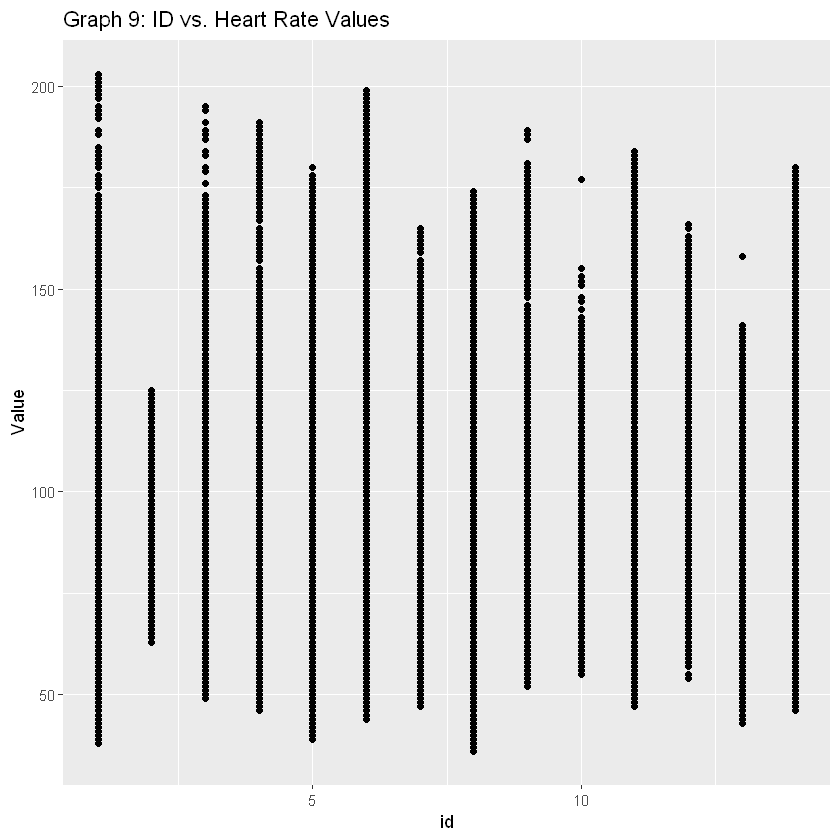

In [38]:
df1 <- heartRate %>% group_by(Id) %>% mutate(id=cur_group_id())
g9 <- ggplot(data=df1, aes(x=id, y=Value)) + 
  geom_point()+ labs(title="Graph 9: ID vs. Heart Rate Values")
theme(plot.title = element_text(size=20))
g9

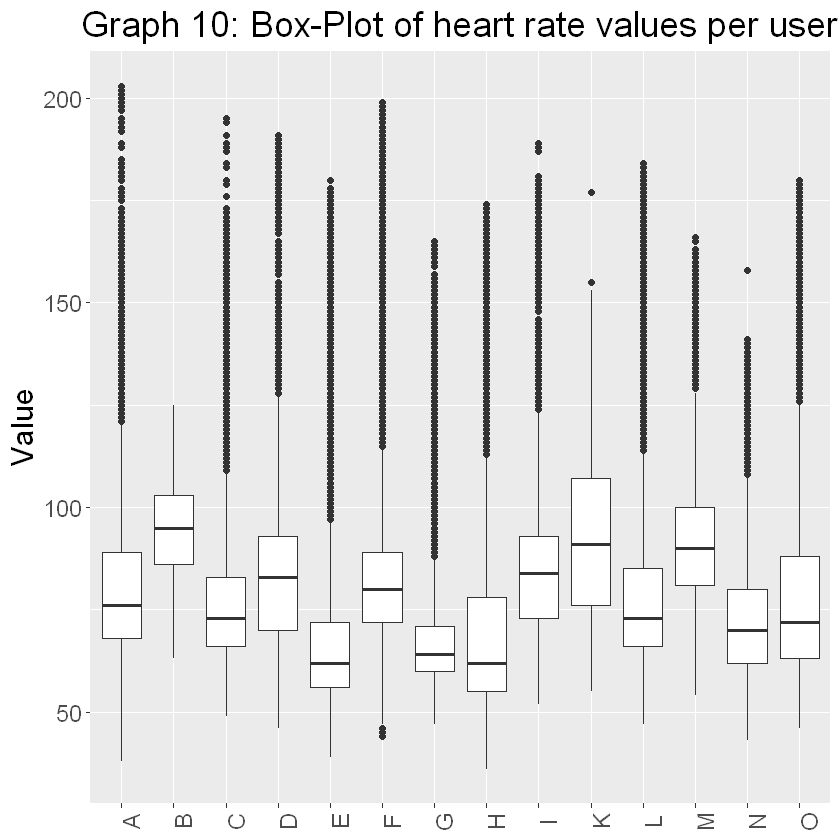

In [39]:
g10 <- df1 %>%
summarise(
id = factor(case_when(
    id == 1 ~ "A",
    id == 2 ~ "B",
    id == 3 ~ "C",
    id == 4 ~ "D",
    id == 5 ~ "E",
    id == 6 ~ "F",
    id == 7 ~ "G",
    id == 8 ~ "H",
    id == 9 ~ "I",
    id == 10 ~ "K",
    id == 11 ~ "L",
    id == 12 ~ "M",
    id == 13 ~ "N",
    id == 14 ~ "O",
),levels=c("A", "B", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "O")), Value, ,.groups="drop") %>%
drop_na() %>%
group_by(id) %>%
ggplot(aes(id,Value)) +
    geom_boxplot() +
    labs(title="Graph 10: Box-Plot of heart rate values per user",x=NULL) + 
    theme(legend.position="top", text = element_text(size = 18),plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=90, hjust=0.5))
g10

In [40]:
df2 <- heartRate %>%
  group_by(Id) %>%
  summarize(max = max(Value), min = min(Value), mean = mean(Value))
df2

Id,max,min,mean
<dbl>,<int>,<int>,<dbl>
2022484408,203,38,80.23686
2026352035,125,63,93.77631
2347167796,195,49,76.72279
4020332650,191,46,82.30058
4388161847,180,39,66.13300
4558609924,199,44,81.67395
5553957443,165,47,68.63309
5577150313,174,36,69.56452
6117666160,189,52,83.74989


We can see here that the heart rates have gone to alarming values, specially of 1st, 3rd, 6th & 8th participant & some mean values are not looking good as expected.

# **PHASE 6 : ACT**

In this final step, we will be delivering our insights and providing recommendations based on our analysis.

As we already know, collecting data on activity, sleep, stress, weight and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits which helps them understand themselves better, sync their cycle, reach their goals, and increase the quality of their life. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioning itself as a tech-driven wellness company for women.
<img src="Bellabeat1.jpg">

**Target Audience:**

* Women who work full-time jobs and spend a lot of time in front of a screen, in a meeting or focused on work that they are doing.
* Women who are not much into health & fitness and need to be inspired/enlightened about a healthy life-style & other health benefits.
* Women who are also enthusiastic about their activity data and regular health data.

Time for revisiting our business questions and getting started with our high-level business recommendations.

**6.1 Findings & Recommendations:**

**1. What are the trends identified?**

* Average total steps per day are 8414, which are good for having health benefits for according to the CDC research, but can be improved atleast to 10000 steps/day as a 2020 study found that participants who took 8,000 steps per day had a 51% lower risk of dying by any cause compared with those who took 4,000 per day. This trend continued with higher step counts, as participants who took 12,000 steps per day had a 65% lower risk of dying than those who took 4,000.
* Average sedentary time is 697.5 minutes or ~11.6 hours which is a lot if you count 7 hours/day as 'sleep time' and the rest 5.4 hours of time left from 24 hours total for any other activities. Normally, more than 11 hours/day of sedentary behaviour is lifestyle of people of age more than 70 years.
* The majority of the participants are only lightly active, therefore the average calories burnt is also low i.e. 2375/day.
* The average total intensity per hour of their activities is also low i.e. 12.
* On the average, participants sleep 1 time for ~7.3 hours.
* Minimum & Maximum value for heart rate has gone to 36 & 203 respectively, which is not a good sign for heart health.
* Better part of the users are mostly Sedentary or Lightly active users but it's very interesting to see that even though they are the biggest category, the Fairly active and most importantly, the Very active are the ones with more calories burnt. That is not necessarily surprising but it confirms the suspicion that the level of activity relates with the calories burnt and so it's an important factor in any effort to lose weight.
* The most calories burnt are the "6k > & < 10k Steps" and "> 7 kms" which would indicate some kind of running activity that allows the user to burn more calories with less steps. Thus, showing that speed & intensities are important for more calorie burn than distance.
* The 'Sedentary' & 'Lightly Active' users were the largest percentage of bad sleepers and with some fair activity we see an increase of normal sleepers with a good amount of increase in 'Very Active' users & the decrease of over sleepers (more than 8 hours) in the most active categories which makes sense given the fact that they are people that don't like sticking around in bed for a long time.
* 50 percent of users are living having a sedentary lifestyle, and almost 40 percent of users are only lightly active. So, overall 85-90 percent of users are either have a sedentary lifestyle or are lightly active.
* The relationship between Total Minutes Asleep and Total Time in Bed looks almost linear, but is little curving towards more Total Time in Bed.
* People are most active between 5 am and 7pm. I suppose, that people go to a gym or for a walk after finishing work.

**2. How could these trends apply to Bellabeat customers & would help influence Bellabeat marketing strategy?**

* To increase the number of steps or daily activity, Bellabeat app could introduce a daily goal system and virtual achievements like special virtual tokens or coins along with notifications on completion/incomplete goal, that would encourage users to go to that extra mile beyond their comfort level.
* To decrease the amount of sedentary time Bellabeat app could introduce a notification timer for "sitting idle for a long time" that could alert customers say if they are inactive for more than an hour and they need to walk or stretch out.
* Bellabeat app could alert customer if their heart rate is going to alarming levels and introduce a quick emergency contact, that would send an alert about your alarming heart rate to your friends/family and moreover it could also notify you if your average heart rate is not in normal range.
* It could encourage users to go for a more intensive workout atleast even for a small time but everyday, which would create a routine in their daily life schedule specially for people who are trying to loose weight and can show them live what a good amount of calorie they are burning while doing an intensive workout.
* If users want to improve their sleep, Bellabeat should consider using app notifications to go to bed, and if they are unable to sleep even while lying on bed let's say because of stress, it could introduce features like sleep music, calming tones, white noises etc. to get them sleep as soon as possible and also lowering stress levels simultaneously.
* As most activity happens between 5 pm and 7 pm, since people go to a gym or for a walk after finishing work. Bellabeat could use this time to remind and motivate users to go for a run or walk.

With all this in mind, I will strongly suggest to focus on the marketing of how it is a great help in improving sleep and lowering stress and on the fitness/losing weight aspects of the devices as using this device to track their sleep and activity will encourage the user to increase their activities seeing the improvement in their metrics.

**6.2 Current Limitations, Future updates & Projections:**

Here we are trying to have some good high-level projections for a company focusing solely on women and as there was no gender information about the participants, I assumed that all genders were presented and balanced in this data set, but we need more data on women participants specially about their reproductive health and weight data, as we were unable to do any analysis in these fields.

Also, the sample data for these analysis was extremely low, and they don't represent a population at all, so overall a good amount of sample data, specially containing data on women's health is needed for more acurate projections.

If that is to be found, also along with some surveys from the users as what they would like to get as features in Bellabeat, the company could use that data to fine tune there projections and finding some more hidden insights, and improving their user interface.

Thank you for showing interest in my Bellabeat Case Study & sticking on till the end! I hope you all enjoyed reading.

This is my first project using R. I would appreciate any comments and recommendations for improvement!

Wish you all a wonderful day!

To the future,

Vishal Raj